In [5]:
# Basic example using classic computing
# 5 is in the position 12 of the list (starting from 0)
list = [1, 2, 3, 4, 1, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]

# We make the logic go the "Oracle"
def oracle(input):
  winner = 5
  if input == winner:
    response = True
  else:
    response = False
  return response

# We iterate over the list and check if the number is the winner with the help of the oracle
for index, trial_number in enumerate(list):
  if oracle(trial_number) is True:
    print(f"{trial_number} is the winner! It is in the position {index} of the list")
    print('%i calls to the Oracle' % (index + 1))
    break

5 is the winner! It is in the position 12 of the list
13 calls to the Oracle


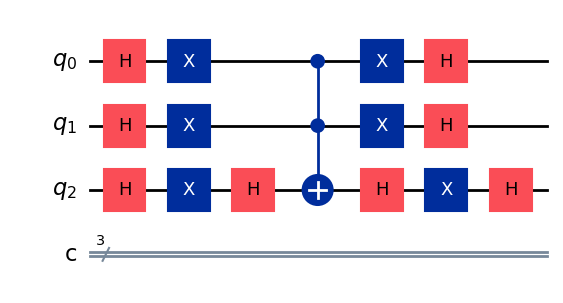

In [1]:
# We import the needed libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Implement the oracle in a quantum circuit
Grover = QuantumCircuit(3, 3)

Grover.h([0, 1, 2]) # Apply the H-gate to all qubits
Grover.x(range(3)) # Apply the X-gate to all qubits


# Grover.barrier() # Barrier that separates the oracle from the diffuser
Grover.h(2) # Apply the H-gate to the ancilla qubit
Grover.ccx(0, 1, 2) # Apply the CCX gate
Grover.h(2) # Apply the H-gate to the ancilla qubit
# Grover.barrier() # Barrier that separates the oracle from the diffuser

Grover.x(range(3)) # Apply the X-gate to all qubits
Grover.h(range(3)) # Apply the H-gate to all qubits

Grover.draw(output='mpl')

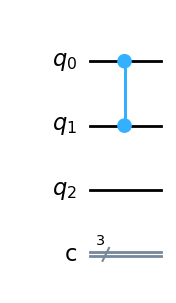

In [2]:
Detector = QuantumCircuit(3,3)

Detector.cz(1,0) # Apply the CZ gate between qubits 1 and 0
Detector.draw(output = "mpl")

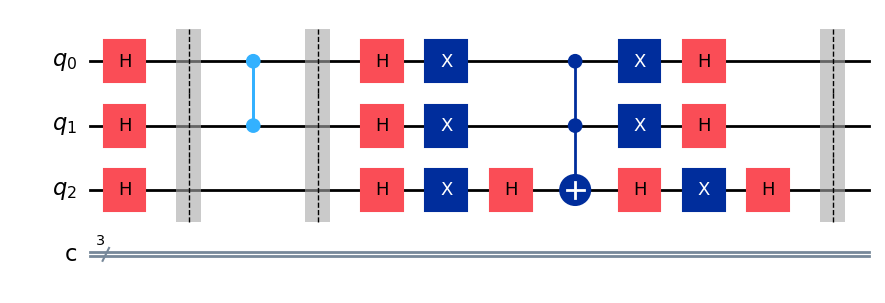

In [3]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ.compose(Detector)
circ.barrier(range(3))
circ = circ.compose(Grover)
circ.barrier(range(3))
# circ.measure(range(3), range(3))
circ.draw(output = "mpl")



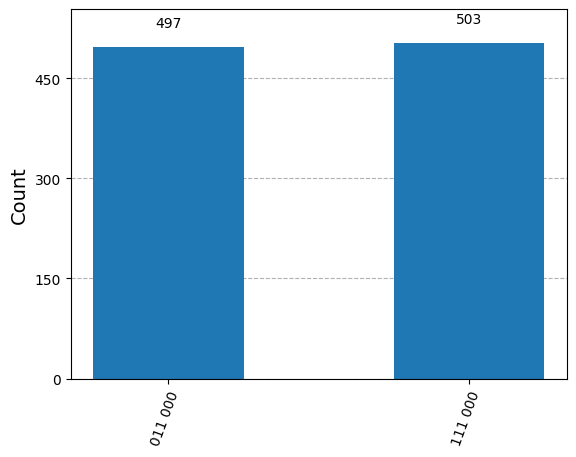

In [4]:
# Measure Time
circ.measure_all()  # This adds measurement to all qubits

# Initialize the simulator
simulator = AerSimulator()
# Transpile the circuit for the simulator
compiled_circuit = transpile(circ, simulator)
# Run 1000 times and get counts
job = simulator.run(compiled_circuit, shots=1000)

# Get the result and Plot the histogram
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
